In [119]:
import pandas as pd
import os
import datetime as dt
from matplotlib import pyplot as plt

# Juntando os datasets

In [65]:

df1 = pd.read_csv(os.path.join('data', 'features.csv'), parse_dates=True)
df2 = pd.read_csv(os.path.join('data', 'stores.csv'), parse_dates=True)
df3 = pd.read_csv(os.path.join('data', 'train.csv'), parse_dates=True)

In [66]:
df1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [67]:
df2.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [68]:
df3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [69]:
df4= df1.merge(df2, on='Store', how='left')

In [70]:
df4.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [71]:
df=df4.merge(df3[['Store','Dept','Date','Weekly_Sales']], on=['Store','Date'], how='inner')

In [72]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [73]:
df = df.sort_values(by='Date')


# Removendo variaveis exógenas para primeira analise

In [138]:
df1=df[['Date','Weekly_Sales']]

In [139]:
df1[['Weekly_Sales']].describe()

,Weekly_Sales
count,421570.000000
mean,15981.258123
std,22711.183519
min,-4988.940000
25%,2079.650000
50%,7612.030000
75%,20205.852500
max,693099.360000


In [140]:
df1.loc[df1['Weekly_Sales']<=0]

,Date,Weekly_Sales
48832,2010-02-05,-59.00
293759,2010-02-05,-12.00
78698,2010-02-05,-15.00
411987,2010-02-05,-2.45
138174,2010-02-05,-0.04
...,...,...
167302,2012-10-26,-11.00
286534,2012-10-26,-178.15
340273,2012-10-26,-16.51
187305,2012-10-26,-18.00


In [141]:
df1=df1.loc[df1['Weekly_Sales']>0]
df1=df1.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

In [142]:
df1=df1.set_index('Date')

In [143]:
df1.head()

,Weekly_Sales
Date,
2010-02-05,49750875.98
2010-02-12,48336800.10
2010-02-19,48277902.33
2010-02-26,43970440.65
2010-03-05,46872715.16


In [156]:
df1.tail()

,Weekly_Sales
Date,
2012-09-28,43735713.56
2012-10-05,47567053.49
2012-10-12,46128909.98
2012-10-19,45122443.96
2012-10-26,45544379.53


In [149]:
df1[['Weekly_Sales']].describe()

,Weekly_Sales
count,1.430000e+02
mean,4.711404e+07
std,5.444161e+06
min,3.960038e+07
25%,4.488090e+07
50%,4.624396e+07
75%,4.779222e+07
max,8.093159e+07


<Axes: xlabel='Date'>

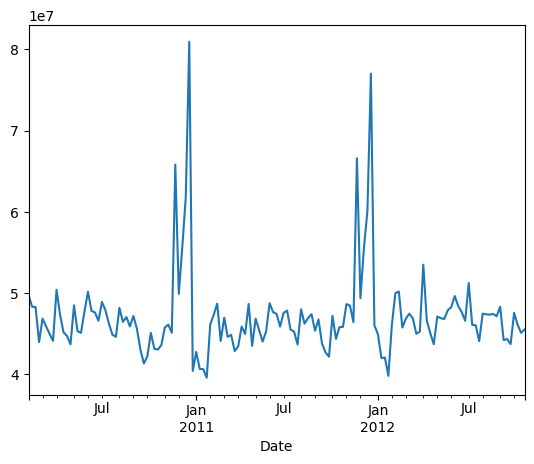

In [144]:
df1['Weekly_Sales'].plot()

## Decompondo

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1200x600 with 0 Axes>

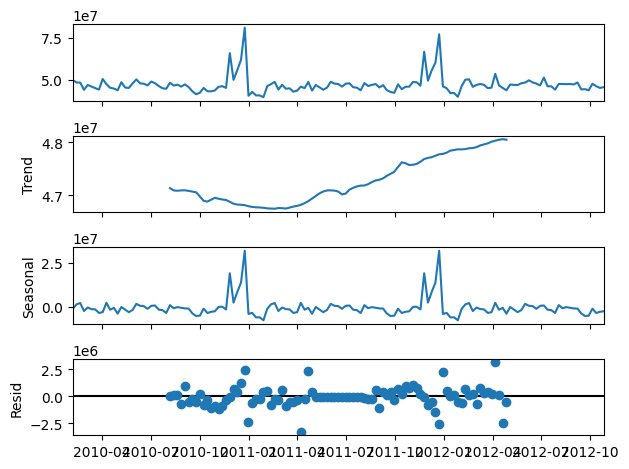

In [146]:

resultado = seasonal_decompose(df1)

fig = plt.figure(figsize=(12, 6))  
fig = resultado.plot()

## Avaliando estacionariedade

In [151]:
from statsmodels.tsa.stattools import adfuller

In [155]:
resultado = adfuller(df1)
print(f'Teste ADF:{resultado[0]}')
print(f'p-valor:{resultado[1]}')

Teste ADF:-5.908397717797433
p-valor:2.674606788825844e-07
